# Tutorial Linear Regresion

In [1]:
import theano
from theano import tensor as T
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate xdata input
xdata = np.linspace(-1, 1, 101)
# likes: y = mx + c  Generate ydata output
ydata = 5 * xdata + np.random.randn(*xdata.shape) * 0.33

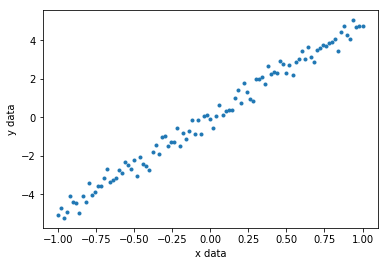

In [4]:
# Show/Plot generated data ydata by xdata
plt.plot(xdata, ydata, '.')
plt.ylabel('y data')
plt.xlabel('x data')
plt.show()

In [11]:
# Initialize theano variables
learnrt = 0.01

# X, Y input as scalar
X = T.scalar()
Y = T.scalar()

# W shared var as 0D array of float 
# W is a gradient in cartesian quadrant base on above plot
W = theano.shared(np.asarray(0., dtype=theano.config.floatX))

# y function as a linear function, y = m*x
y = X * W

# Cost fucntion as a mean of all square error data
cost = T.mean(T.sqr(y - Y))


'''
T.grad?
Signature: T.grad(cost, wrt, consider_constant=None, disconnected_inputs='raise', add_names=True, 
                  known_grads=None, return_disconnected='zero', null_gradients='raise')
Docstring: Return symbolic gradients for one or more variables with respect to some cost.
cost     : Scalar (0-dimensional) tensor variable or None Value with respect to which we are differentiating.
           May be  `None` if known_grads is provided.
wrt      : variable or list of variables term[s] for which we want gradients
'''
grd = T.grad(cost=cost, wrt=W)

upd = [[W, W - grd * learnrt]]

f_train = theano.function(inputs=[X, Y], outputs=cost, updates=upd, allow_input_downcast=True)

In [12]:
# W before train
print('W before train: %f ' % W.get_value())

W before train: 0.000000 


In [13]:
# Training
epoch = 100
for i in range(epoch):
    for x, y in zip(xdata, ydata):
        f_train(x, y)

In [14]:
# W after train        
print('W after train: %f ' % W.get_value()) #something around 5

W after train: 4.968543 


In [17]:
# Predict
xtest = 0.5
ypred = xtest * W
print("Predicted: ypred = %d if xtest = %d " % (xtest, float(ypred.eval())))

Predicted: ypred = 0 if xtest = 2 
